In [1]:
import numpy as np
import matplotlib.pyplot as plt

def SSS(A, B, C):
    # compute angle opposite of side C
    arg = (A * A + B * B - C * C)/(2.0 * A * B)
    return np.degrees(np.arccos( arg ) )

In [2]:
# size of domain (e.g., meters)
nx = 26
ny = 41
x = np.linspace(0, nx-1, num=nx)
y = np.linspace(0, ny-1, num=ny)
X, Y = np.meshgrid(x,y)
print('X, Y, and Z have shape ',np.shape(X))

X, Y, and Z have shape  (41, 26)


In [3]:
# Flat surface
Zflat = np.zeros_like(X) # flat surface

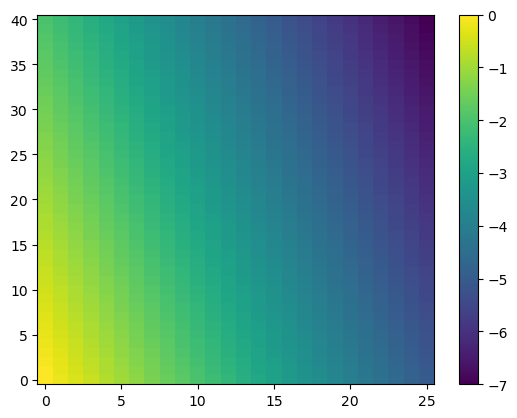

In [4]:
# Sloping surface
yslope = -1/20.
xslope = -1/5.
Zslope = Y*yslope + X*xslope
plt.pcolormesh(X, Y, Zslope, shading='nearest')
plt.colorbar()

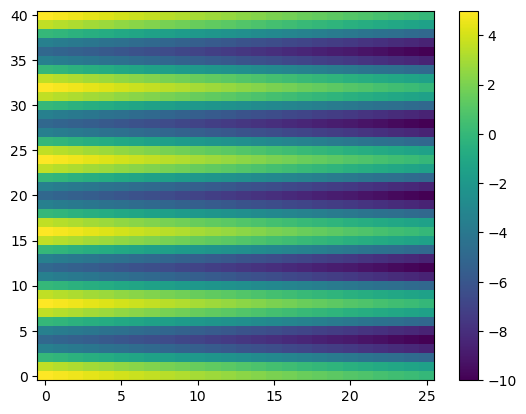

In [5]:
# Rippled surface
yamp = 5
ylen = 8
xslope = -1/5.
Zripple = yamp*np.cos(2*np.pi*Y/ylen) + X*xslope
plt.pcolormesh(X, Y, Zripple, shading='nearest')
plt.colorbar()

In [6]:
# pick one of the surfaces
# Z = Zflat
# Z = Zslope
Z = Zripple

In [7]:
XYZ = np.vstack( (X.ravel(), Y.ravel(), Z.ravel()) ).T
print('XYZ has shape ',np.shape(XYZ))

XYZ has shape  (1066, 3)


In [8]:
# coordinates for two cameras
c1 = np.array((0, 0, 6))
c2 = np.array((5, 0, 6))

In [9]:
A = np.sqrt( np.sum( (XYZ-c1)**2, 1 ) )
B = np.sqrt( np.sum( (XYZ-c2)**2, 1 ) )

In [10]:
C = np.sqrt( np.sum((c2-c1)**2) )
print(C)

5.0


In [11]:
def SSS(A, B, C):
    # compute angle opposite of side C
    arg = (A * A + B * B - C * C)/(2.0 * A * B)
    return np.degrees(np.arccos( arg ) )

ang = SSS(A, B, C).reshape( (ny, nx) )
print('Shape ang: ',np.shape(ang))
print('Shape X and Y: ',np.shape(X),np.shape(Y))

Shape ang:  (41, 26)
Shape X and Y:  (41, 26) (41, 26)


Text(0, 0.5, 'Y (m)')

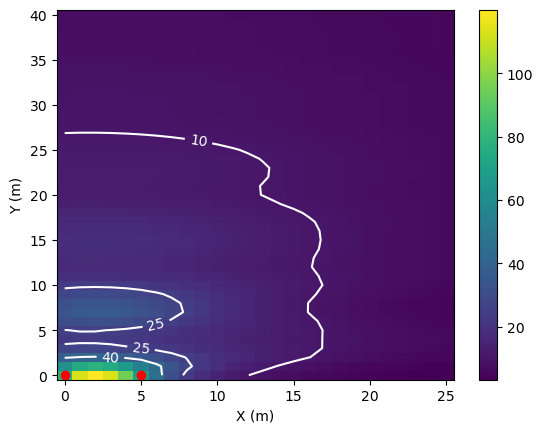

In [12]:
levels=[10,25,40]
plt.pcolormesh(X, Y, ang, shading='nearest')
plt.colorbar()
#plt.contourf(X, Y, ang, levels=levels,colors='white', alpha = .3)
cs=plt.contour(X, Y, ang, levels=levels,colors='white')
plt.clabel(cs, levels)
plt.plot(c1[0],c1[1],'or')
plt.plot(c2[0],c2[1],'or')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')